In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir = r'/content/drive/MyDrive/Colab Notebooks/Final_Assignment_Face Mask Dataset/Train'
validation_dir = r'/content/drive/MyDrive/Colab Notebooks/Final_Assignment_Face Mask Dataset/Validation'
test_dir =r'/content/drive/MyDrive/Colab Notebooks/Final_Assignment_Face Mask Dataset/Test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10033 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4096)              33558528  
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 58,040,897
Trainable params: 58,040,897
No

In [ ]:
conv_base.trainable = False

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("FaceMaskDetection_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator,
      callbacks=[checkpoint_cb])

Epoch 1/5
502/502 [==============================] - 3265s 6s/step - loss: 0.1848 - acc: 0.9282 - val_loss: 0.0395 - val_acc: 0.9837
Epoch 2/5
502/502 [==============================] - 3235s 6s/step - loss: 0.1200 - acc: 0.9551 - val_loss: 0.1052 - val_acc: 0.9613
Epoch 3/5
502/502 [==============================] - 3239s 6s/step - loss: 0.0983 - acc: 0.9636 - val_loss: 0.0415 - val_acc: 0.9862
Epoch 4/5
502/502 [==============================] - 3229s 6s/step - loss: 0.0956 - acc: 0.9665 - val_loss: 0.0226 - val_acc: 0.9925
Epoch 5/5
502/502 [==============================] - 3184s 6s/step - loss: 0.0859 - acc: 0.9689 - val_loss: 0.0342 - val_acc: 0.9875


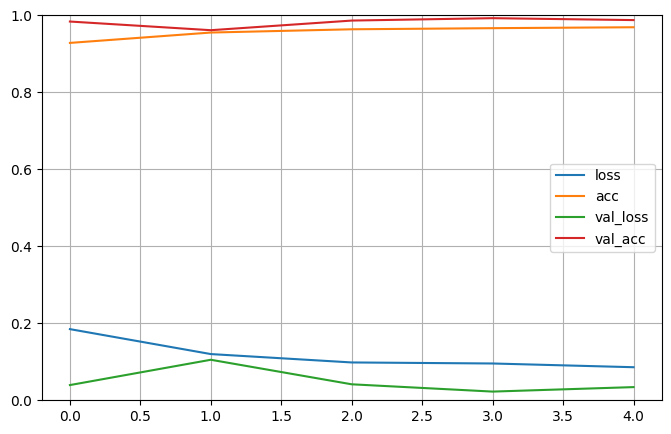

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array

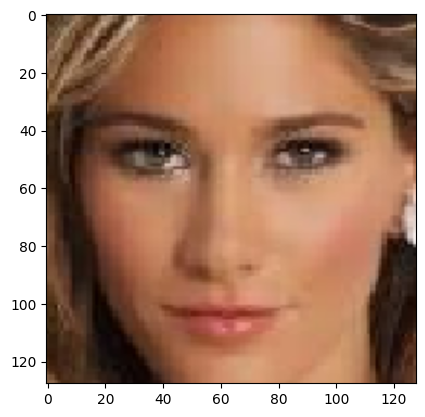

1/1 [==============================] - 0s 445ms/step
[[1.]]


In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Final_Assignment_Face Mask Dataset/Validation/WithoutMask/1200.png',target_size=(128,128))
plt.imshow(img)
plt.show()
x=img_to_array(img)

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#img_data.shape
# print(img_data)
Probability = model.predict(img_data)

print(Probability)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 1022 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

52/52 [==============================] - 273s 5s/step - loss: 0.0401 - acc: 0.9834


[0.04014497995376587, 0.9833659529685974]

In [ ]:
prob = model.predict(test_generator)

In [ ]:
rounded = [np.round(x,3) for x in prob]
rounded

[array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.952], dtype=float32),
 array([0.002], dtype=float32),
 array([0.017], dtype=float32),
 array([0.946], dtype=float32),
 array([1.], dtype=float32),
 array([0.001], dtype=float32),
 array([0.999], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.996], dtype=float32),
 array([0.997], dtype=float32),
 array([0.], dtype=float32),
 array([0.522], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.999], dtype=float32),
 array([0.989], dtype=float32),
 array([0.956], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.018], dtype=float32),
 array([0.002], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.73], dtype=float32),
 array([0.002], dtype=float3

In [ ]:
if prob[2][0]<=0.5:
    out = "With Mask"
    probab = 100*(1-prob)
    remedy = "Good! Keep it up"
    print(remedy)
else:
    out = "without Mask"
    probab = 100*prob
    remedy = "Wear Mask"
    print(remedy)

Wear Mask
